## Pandas challege

In [1]:
import pickle
with open('all_movie_cldf.pkl', 'r') as f:
    df = pickle.load(f)

In [2]:
df.head()

,rating,domes_total_gross,widest_theat,genre,runtime_min,movie_title,distributor,year,month,date,release_date
0,Unrated,78079,6,Drama,86,Love Comes Lately,Kino,2008,6,13,"June 13, 2008"
1,G,3957934,141,Period Drama,104,The Winslow Boy,Sony Classics,1999,4,30,"April 30, 1999"
2,Unrated,783,1,Unknown,95,Port Djema,Shadow Dist.,1999,1,1,"January 1, 1999"
3,R,1189709,227,Unknown,95,Return to Horror High,New World,1987,1,9,"January 9, 1987"
4,PG,486434,15,Unknown,83,September,Orion Pictures,1987,12,18,"December 18, 1987"


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1. Plot domestic total gross over time

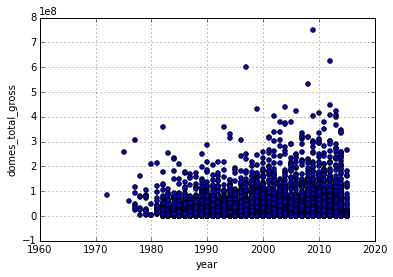

In [4]:
df.plot(kind='scatter', x='year', y='domes_total_gross')

## 2. Plot runtime vs domestic total gross

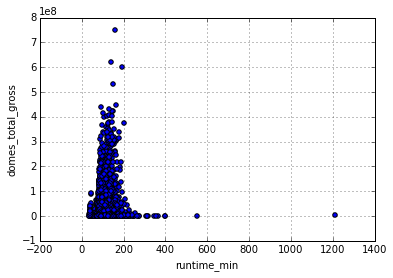

In [5]:
df.plot(kind='scatter', x='runtime_min', y='domes_total_gross')

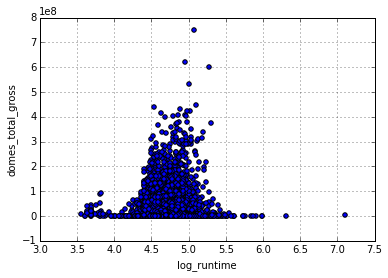

In [6]:
df['log_runtime'] = np.log(df.runtime_min)
df.plot(kind='scatter', x='log_runtime', y='domes_total_gross')

## 3. Group your data by Rating and find the average runtime and domestic total gross at each level of Rating

In [9]:
gb = df.groupby('rating')
gb.mean()

,domes_total_gross,widest_theat,runtime_min,year,month,date,log_runtime
rating,,,,,,,
G,36966244.432526,1368.903114,86.508651,1999.439446,6.927336,16.041522,4.433182
GP,275902.000000,1.000000,93.000000,1994.000000,7.000000,13.000000,4.532599
NC-17,2681282.931034,121.413793,106.620690,1998.551724,6.827586,14.586207,4.653981
Not Yet Rated,385098.538462,32.153846,101.307692,2015.000000,2.461538,14.000000,4.604140
PG,34834834.544781,1330.135354,102.144781,1997.987205,6.885522,15.884848,4.609382
PG-13,37675232.409594,1472.400984,106.440754,2002.612546,6.745797,16.259533,4.654102
R,14749442.689387,761.617673,104.943162,2000.734236,6.799512,15.984236,4.641497
Unrated,442239.328416,15.461187,102.788901,2007.669828,6.488233,15.335441,4.601603


## 4. Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross

In [148]:
df['log_domes_total_gross'] = np.log(df.domes_total_gross)
dlm = df.iloc[:,[0,1,7]]
gb = dlm.groupby(['rating','year']).mean()
gby = pd.DataFrame(gb)
gby

domes_total_gross
rating  year                   
G       1979       8.225846e+07
        1982       1.108730e+07
        1983       2.077807e+07
        1984       2.513523e+07
        1985       1.131147e+07
        1986       1.315865e+07
        1987       2.163633e+07
        1988       2.802254e+07
        1989       2.413889e+07
        1990       2.121361e+07
        1991       4.753410e+07
        1992       3.959243e+07
        1993       1.744101e+07
        1994       5.748589e+07
        1995       3.796622e+07
        1996       2.666003e+07
        1997       3.459610e+07
        1998       4.710513e+07
        1999       4.832986e+07
        2000       3.516281e+07
        2001       5.184291e+07
        2002       2.683678e+07
        2003       4.153261e+07
        2004       4.385881e+07
        2005       3.000592e+07
        2006       4.910874e+07
        2007       4.146826e+07
        2008       5.130768e+07
        2009       3.539052e+07
        2010       1.015274e+08
...                         ...
Unrated 1986       7.941047e+06
        1987       3.202473e+06
        1988       1.013171e+06
        1989       5.918238e+05
        1990       5.468540e+05
        1991       1.697567e+04
        1992       7.742670e+05
        1993       7.124401e+05
        1994       1.638355e+06
        1995       5.082009e+05
        1996       1.281281e+05
        1997       3.069180e+05
        1998       9.106356e+06
        1999       1.495177e+06
        2000       1.271159e+06
        2001       5.973008e+05
        2002       1.139082e+06
        2003       5.151614e+05
        2004       2.899585e+05
        2005       5.329039e+05
        2006       1.916607e+05
        2007       2.805681e+05
        2008       2.595751e+05
        2009       1.762563e+05
        2010       1.695434e+05
        2011       2.386202e+05
        2012       1.886952e+05
        2013       2.200116e+05
        2014       2.001800e+05
        2015       9.109990e+04

[199 rows x 1 columns]

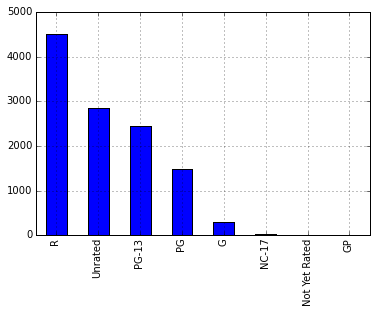

In [37]:
df['rating'].value_counts().plot(kind='bar')


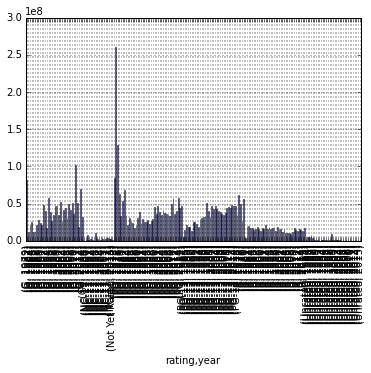

In [61]:
gb['domes_total_gross'].plot(kind='bar', by= ['rating','year'], alpha=0.5)

## 6. Bin your dataset into years (if applicable) and make a bar graph with error bars of gross each year

In [143]:
gby = df.groupby('year').mean()
gbyc = df.groupby('year').count()
gbys = df.groupby('year').std()

gbyd = pd.DataFrame(gby.iloc[:,[0]])
gbyd = gbyd[gbyd.index > 1982]
gbyc = gbyc.iloc[:,[1]]
gbyc = gbyc[gbyc.index  > 1982]
gbyc.columns = ['count']
gbys = gbys.iloc[:,[0]]
gbys = gbys[gbys.index > 1982]
gbys.columns = ['std']
gbys['se'] = gbys['std']/np.sqrt(gbyc['count']) # calculate standard error


,std,se
year,,
1983,29162412.660881,2567607.265791
1984,35656770.630225,2992249.720995
1985,27857982.399759,2259580.747362
1986,28290189.394540,2138537.305168
1987,26978331.504776,1962384.861020
1988,26754934.976222,1855120.960163
1989,34837109.915591,2427216.460070
1990,37548534.403778,2609803.549969
1991,30285697.556090,2060680.708797


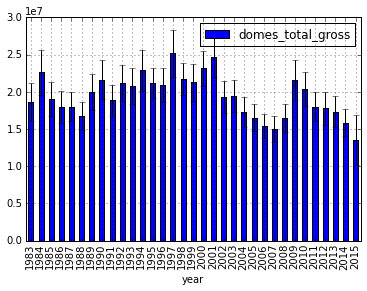

In [147]:

gbyd.plot(kind='bar', yerr =gbys.se)
